In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        plt.plot(r[0], label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
%load_ext autoreload
%autoreload 2

# Chapter 5 Monte Carlo

### 5.1 Use MC to evaluate V

code see [OnlineMC](./c05_mc.py#L37)

<img src="./avatar/c05_1.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 496 ms, sys: 5.27 ms, total: 501 ms
Wall time: 523 ms
CPU times: user 26.5 s, sys: 281 ms, total: 26.8 s
Wall time: 28.6 s
CPU times: user 11.7 s, sys: 199 ms, total: 11.9 s
Wall time: 13.6 s


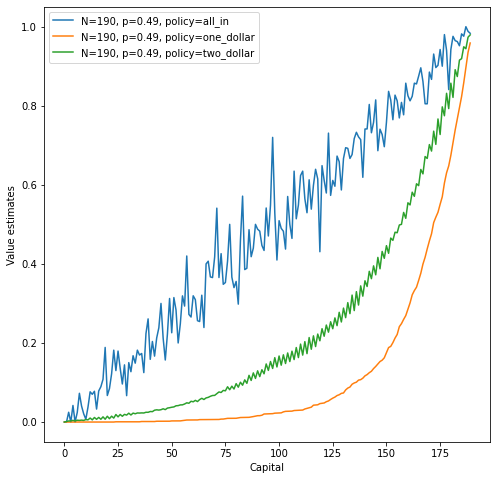

In [2]:
from c00_env import GamblerEnv, GamblerPolicy
from c05_mc import OnlineMC

env = GamblerEnv(N=190, p=0.49, include_terminate_state=False, seed=11)
mc = OnlineMC(env)
%time v_1 = mc.fit_v(policy=GamblerPolicy['all_in'], epochs=10000)
%time v_2 = mc.fit_v(policy=GamblerPolicy['one_dollar'], epochs=2000)
%time v_3 = mc.fit_v(policy=GamblerPolicy['two_dollar'], epochs=2000)

draw_gambler([
    (v_1, 'N={}, p={}, policy={}'.format(190, 0.49, 'all_in')),
    (v_2, 'N={}, p={}, policy={}'.format(190, 0.49, 'one_dollar')),
    (v_3, 'N={}, p={}, policy={}'.format(190, 0.49, 'two_dollar')),
])

In [3]:
from c00_env import HermanEnv, HermanPolicy
from c05_mc import OnlineMC

env = HermanEnv(N=11, M=3, p=0.5, seed=11)
mc = OnlineMC(env)
%time v_1 = mc.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))

CPU times: user 957 ms, sys: 21.4 ms, total: 978 ms
Wall time: 1.01 s
[ 3.3251  5.7171  7.7108  8.8037  8.8515 10.0567 13.0066 14.5252 16.2502
 17.5255] 17.5255 (0, 3, 7)


In [4]:
from c00_env import HermanEnv
env = HermanEnv(N=11, M=7, p=0.5, seed=11)
mc = OnlineMC(env)
%time v_2 = mc.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(np.max(v_2), env.get_state_name(np.argmax(v_2)))

CPU times: user 1.05 s, sys: 33.5 ms, total: 1.08 s
Wall time: 1.08 s
17.4749 (0, 1, 2, 4, 6, 7, 8)


### 5.2 Use MC Exploring Starts to evaluate optimal policy

code see [OnlineMCES](./c05_mc.py#L92)

<img src="./avatar/c05_2.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 1.17 s, sys: 173 ms, total: 1.34 s
Wall time: 1.21 s
1 [0.0035]
2 [0.0118 0.0147]
3 [0.023  0.0475 0.0372]
4 [0.0822 0.0625 0.0418 0.0657]
5 [0.1068 0.0844 0.0847 0.0558 0.2215]
6 [0.2    0.1259 0.1246 0.2027]
7 [0.2406 0.2597 0.2407]
8 [0.3016 0.3513]
9 [0.4729]


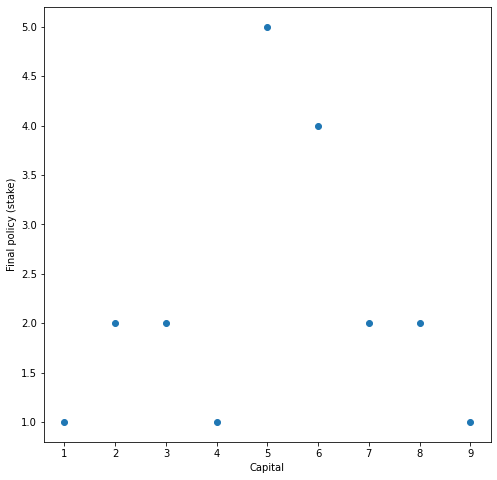

In [5]:
from c00_env import GamblerEnv
from c05_mc import OnlineMCES

env = GamblerEnv(N=10, p=0.2, include_terminate_state=False, seed=11)
mc = OnlineMCES(env)
%time q_1 = mc.fit_q(epochs=10000)

for k, v in q_1.items():
    print(k, v)
draw_policy(q_1, env.get_all_state_action())

### 5.3 Use MC epsilon soft greedy to evaluate optimal policy

slight different from 5.2

code see [OnlineMCSoft](./c05_mc.py#L129)

<img src="./avatar/c05_3.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 1.26 s, sys: 27.1 ms, total: 1.29 s
Wall time: 1.36 s
1 [0.0932]
2 [0.174  0.1928]
3 [0.245  0.2863 0.2715]
4 [0.3868 0.3766 0.3841 0.371 ]
5 [0.4643 0.4811 0.4634 0.4876 0.4903]
6 [0.5543 0.5906 0.4531 0.5925]
7 [0.6716 0.6984 0.6725]
8 [0.7729 0.7869]
9 [0.8917]


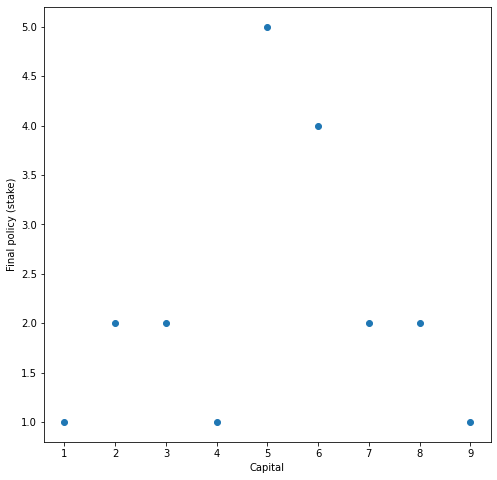

In [2]:
from c00_env import GamblerEnv
from c05_mc import OnlineMCSoft

env = GamblerEnv(N=10, p=0.49, include_terminate_state=False, seed=11)
mc = OnlineMCSoft(env)
%time q_2 = mc.fit_q(epochs=10000)

for k, v in q_2.items():
    print(k, v)
draw_policy(q_2, env.get_all_state_action())

### 5.4 Use Offline MC to evaluate Q

code see [OfflineMC](./c05_mc.py#L171)

<img src="./avatar/c05_4.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 521 ms, sys: 9.24 ms, total: 530 ms
Wall time: 1.18 s
CPU times: user 362 ms, sys: 7.2 ms, total: 370 ms
Wall time: 827 ms
CPU times: user 253 ms, sys: 7.78 ms, total: 261 ms
Wall time: 412 ms
1 [0.0887]
2 [0.1629 0.1923]
3 [0.3302 0.3927 0.2888]
4 [0.4021 0.3736 0.3206 0.3986]
5 [0.6164 0.4416 0.761  0.5766 0.4922]
6 [0.6308 0.6319 0.6965 0.5902]
7 [0.6072 0.5798 0.6934]
8 [0.7575 0.7977]
9 [0.9146]


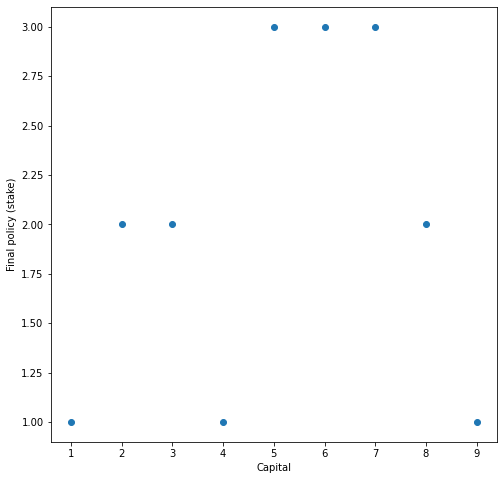

1 [0.0646]
2 [0.1526 0.2052]
3 [0.251  0.2582 0.2676]
4 [0.3611 0.4379 0.288  0.4329]
5 [0.4693 0.3393 0.6645 0.3578 0.6   ]
6 [0.5718 0.4604 0.5563 0.6002]
7 [0.6774 0.7204 0.5686]
8 [0.7818 0.8233]
9 [0.8858]


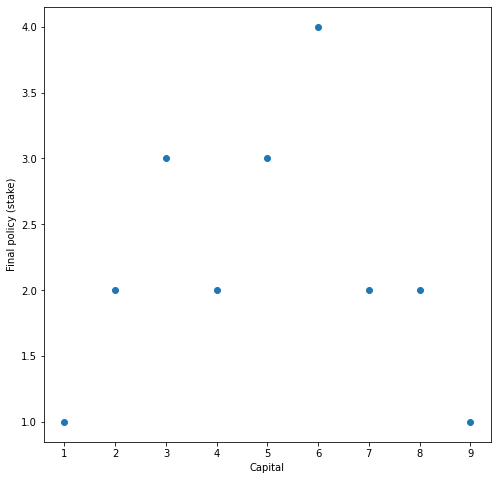

1 [0.0935]
2 [0.1211 0.185 ]
3 [0.3069 0.2348 0.3038]
4 [0.3641 0.3811 0.3942 0.3634]
5 [0.5347 0.4498 0.524  0.4498 0.3846]
6 [0.5482 0.607  0.6081 0.489 ]
7 [0.6444 0.6882 0.6416]
8 [0.7299 0.7993]
9 [0.8913]


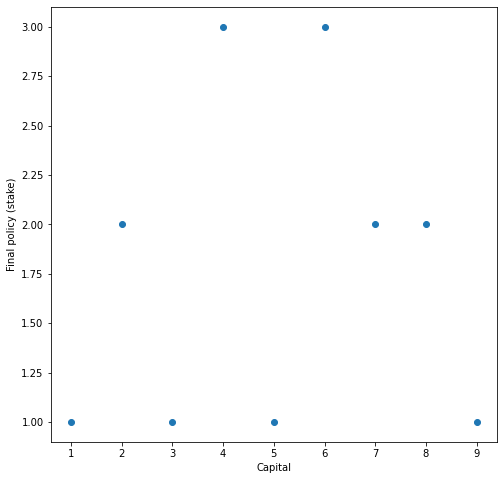

In [9]:
from c00_env import GamblerEnv, GamblerPolicy
from c05_mc import OfflineMC

env = GamblerEnv(N=10, p=0.49, include_terminate_state=False, seed=11)
mc = OfflineMC(env)
%time q_3 = mc.fit_q(policy=GamblerPolicy['all_in'], epochs=10000)
%time q_4 = mc.fit_q(policy=GamblerPolicy['one_dollar'], epochs=2000)
%time q_5 = mc.fit_q(policy=GamblerPolicy['two_dollar'], epochs=2000)

for k, v in q_3.items():
    print(k, v)
draw_policy(q_3, env.get_all_state_action())

for k, v in q_4.items():
    print(k, v)
draw_policy(q_4, env.get_all_state_action())

for k, v in q_5.items():
    print(k, v)
draw_policy(q_5, env.get_all_state_action())

<img src="./avatar/c05_5.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 1.06 s, sys: 15.5 ms, total: 1.08 s
Wall time: 1.09 s
1 [0.0797]
2 [0.1129 0.176 ]
3 [0.2664 0.2567 0.3503]
4 [0.3371 0.3517 0.3597 0.3822]
5 [0.4706 0.424  0.4583 0.4635 0.5005]
6 [0.5052 0.5834 0.5363 0.5531]
7 [0.5802 0.6838 0.6495]
8 [0.7585 0.7831]
9 [0.8913]


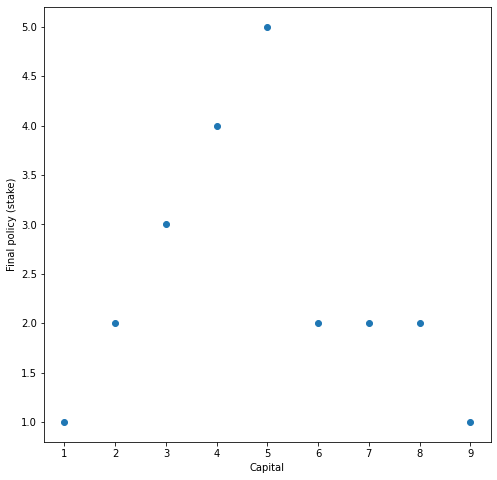

In [8]:
from c00_env import GamblerEnv, GamblerPolicy
from c05_mc import OfflineMC

env = GamblerEnv(N=10, p=0.49, include_terminate_state=False, seed=11)
mc = OfflineMC(env)
%time q_6 = mc.fit_q(epochs=20000)

for k, v in q_6.items():
    print(k, v)

draw_policy(q_6, env.get_all_state_action())